# Numerical Simulation Laboratory

# Numerical exercise 10

## Exercise 10.1
Sviluppo di un algoritmo di simulated annealing per la soluzione del *Travelling Salesman Problem*. 

Come per l'algoritmo genetico, fisso le posizioni $\vec{c}_0, \vec{c}_1 \dots \vec{c}_N$ di $N$ città e rappresento i possibili percorsi con un vettore di interi che indica l'ordine con cui vengono raggiunte le città durante il cammino:
$$ \left [0, 1, 2, \dots, n, \dots N \right] \,.$$
Come nel caso precedente, i possibili percorsi devono partire sempre dalla stessa città e devono passare una ed una sola volta da ciascuna città.
Applicando il simulated annealing, campiono lo spazio dei possibili percorsi sfruttando **l'algoritmo di Metropolis** con una probabilità dipendente da una temperatura fittizia $t$ che cala gradualmente durante l'esecuzione del programma. Ad ogni step dell'algoritmo, applicando gli **operatori di mutazione** sul cammino attuale, genero un nuovo percorso che accetto o rifiuto con una probabilità pari a:
    $$ \alpha = min \left(1, \exp^{-\beta \left( L(\vec{x}')-L(\vec{x}) \right)} \right) \,,$$
dove $L(\vec{x})$ è la lunghezza del percorso attuale, $L(\vec{x}')$ è la lunghezza del percorso proposto e $\beta=\frac{1}{t}$ è l'inverso della temperatura fittizia. In questo modo campiono lo spazio dei possibili percorsi generando $nstep$ cammini ad ogni temperatura fissata e ottenendo progressivamente il percorso corrispondente al minimo della lunghezza.

### <font color='red'> Operatori di Mutazione</font>
Per determinare una nuova percorso a partire da uno dato, utilizzo gli operatori di mutazione seguenti ripresi dall'esercitazione precedente sull'algoritmo genetico:

- *Pair permutation*, che consiste nello scambio di due città scelte casualmente, ad eccezione della prima che non deve essere modificata. Applico l'operatore con una probabilità pari a $P_{pair} = 0.25$.


- *Multiple permutation*, che consiste nello scambio di 2,3,4,5,6 o 7 coppie di città scelte casualmente, ad eccezione della prima città del percorso che non deve essere modificata. Applico l'operatore con una probabilità pari a $P_{mul} = 0.25$.


- *Reverse*, che consiste nell'inversione dell'ordine con cui vengono percorse 2,3 o 4 città lungo il cammino. La città da cui parte l'inversione viene scelta in modo casuale trascurando la prima città del percorso che non deve essere modificata. Applico l'operatore con una probabilità pari a $P_{rev} = 0.30$.


- *Shift*, che consiste nello slittamento di 2,3 o 4 città lungo il percorso ad eccezione della prima la cui posizione deve rimanere invariata. Applico l'operatore con una probabilità pari a $P_{shift} = 0.20$.

Come per l'algoritmo di ricerca genetica, gli operatori di mutazione sono **mutualmente esclusivi** perciò ad ogni step dell'algoritmo il programma applica al più un solo operatore: mantenendo le probabilità costanti durante l'intera ricerca, ad ogni step viene generato un nuovo percorso applicando uno ed un solo operatore di mutazione.

### <font color='blue'> Città lungo una Circonferenza</font>
Applico l'algoritmo di ricerca basato sul *simulated annealing* al caso di $32$ città disposte lungo una circonferenza di raggio $r=10$.
Per ogni temperatura fissata genero $nstep=10^4$ percorsi differenti e, modificando la temperatura per $500$ volte nell'intervallo $[0.01, 5]$, determino complessivamente $5 \times 10^6$ cammini differenti, uno per ogni step dell'algoritmo di Metropolis.

Il grafico seguente mostra il confronto tra la lunghezza del miglior percorso ottenuto tramite simulated annealing in funzione della temperatura e la lunghezza del percorso migliore di ogni generazione ottenuto tramite l'algoritmo genetico della precedente esercitazione. Sebbene il numero di step utilizzati nel simulated annealing sia molto maggiore del numero di generazioni dell'algoritmo genetico, il tempo computazionale è significativamente inferiore in quanto l'algoritmo deve generare un solo percorso ad ogni step. Si può osservare che i due procedimenti convergono a valori di lunghezza simile ma, in questo caso, l'algoritmo genetico produce una soluzione migliore.

Lunghezza finale del Simulated Annealing:  66.1845
Lunghezza finale dell'algoritmo genetico:  62.403


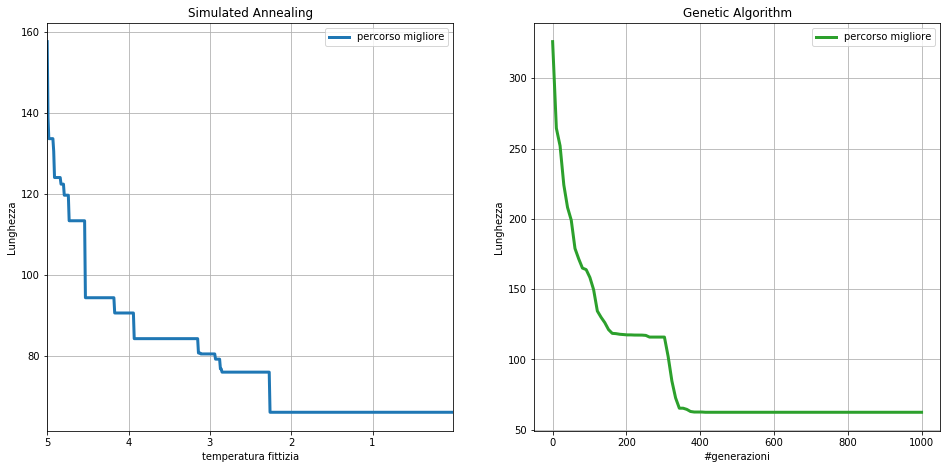

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7.5))

plt.subplot(121) #Simulated Annealing
t, L = np.loadtxt('./Files/Circle/lenght.out', delimiter='  ', unpack=True)
print("Lunghezza finale del Simulated Annealing: ", L[len(L)-1])

plt.plot(t, L, label='percorso migliore', lw=3)
plt.title("Simulated Annealing")
plt.xlim(t[0], t[len(t)-1])
plt.xlabel('temperatura fittizia')
plt.ylabel('Lunghezza')
plt.legend()
plt.grid(True)


plt.subplot(122) #Genetic algorithm
xl, L = np.loadtxt('../LSN_Exercise_09/Files/Circle/lenght.out', delimiter='  ', unpack=True)
x = np.linspace(0, 1000, len(xl))
print("Lunghezza finale dell'algoritmo genetico: ", L[len(L)-1])

plt.plot(x, L, label='percorso migliore', lw=3, c='tab:green')
plt.title("Genetic Algorithm")
plt.xlabel('#generazioni')
plt.ylabel('Lunghezza')
plt.legend()
plt.grid(True)

Il grafico seguente mostra il percorso migliore ottenuto tramite simulated annealing confrontato col miglior percorso ottenuto tramite l'algoritmo genetico della scorsa esercitazione. Si può osservare che in entrambi i casi le città vengono percorse quasi tutte seguendo l'ordine della circonferenza.

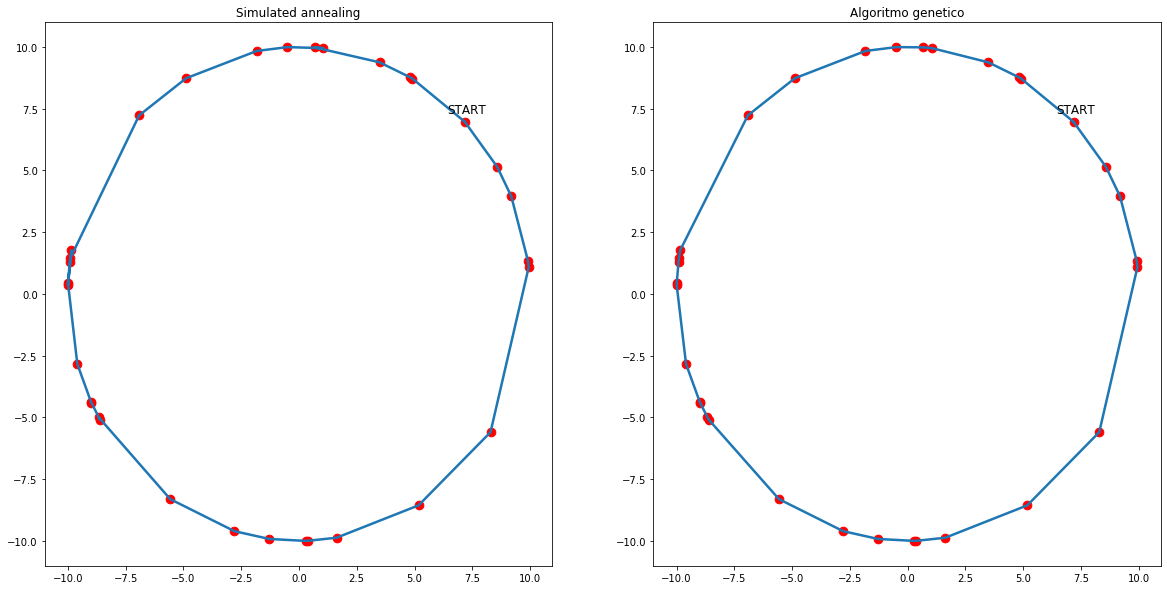

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ncities = 32 #numero delle città
sub = [121, 122] #subplot del grafico
title = ['Simulated annealing', 'Algoritmo genetico'] #titoli dei subplot
xc, yc = np.loadtxt('./Files/Circle/cities.out', unpack=True) #coordinate delle città
filepath = ['./Files/Circle/best_path.out', '../LSN_Exercise_09/Files/Circle/best_path.out'] #path dei percorsi

for j in range(2):
    plt.subplot(sub[j])
    path = np.loadtxt(filepath[j], unpack=True)
    xp = []
    yp = []
    for i in range(ncities):
        index = int(path[i])
        xp.append(xc[index])
        yp.append(yc[index])

    index = int(path[0])
    xp.append(xc[index])
    yp.append(yc[index])

    #numerazione delle città
    #for i in range(32):
    #    plt.text(xp[i]+0.1, yp[i]+0.1, i, fontsize=12)

    plt.title(title[j])
    plt.text(xc[0]-0.75, yc[0]+0.35, 'START', fontsize=12)
    plt.scatter(xc, yc, s=75, c='red') #città
    plt.plot(xp, yp,  zorder=1, lw=2.5) #percorso
    
plt.show()

### <font color='blue'> Città in un Quadrato</font>
Applico l'algoritmo di ricerca basato sul *simulated annealing* al caso di $32$ città disposte all'interno di un quadrato di lato $l=10$.
Per ogni temperatura fissata genero $nstep=10^4$ percorsi differenti e, modificando la temperatura per $500$ volte nell'intervallo $[0.01, 5]$, determino complessivamente $5 \times 10^6$ cammini differenti, uno per ogni step dell'algoritmo di Metropolis.

Il grafico seguente mostra il confronto tra la lunghezza del miglior percorso ottenuto tramite simulated annealing in funzione della temperatura e la lunghezza del percorso migliore di ogni generazione ottenuto tramite l'algoritmo genetico della precedente esercitazione. Sebbene il numero di step utilizzati nel simulated annealing sia molto maggiore del numero di generazioni dell'algoritmo genetico, il tempo computazionale è significativamente inferiore in quanto l'algoritmo deve generare un solo percorso ad ogni step. Si può osservare che i due procedimenti convergono a valori di lunghezza simile ma, in questo caso, l'algoritmo genetico produce una soluzione migliore.

Lunghezza finale del Simulated Annealing:  48.0596
Lunghezza finale dell'algoritmo genetico:  48.5786


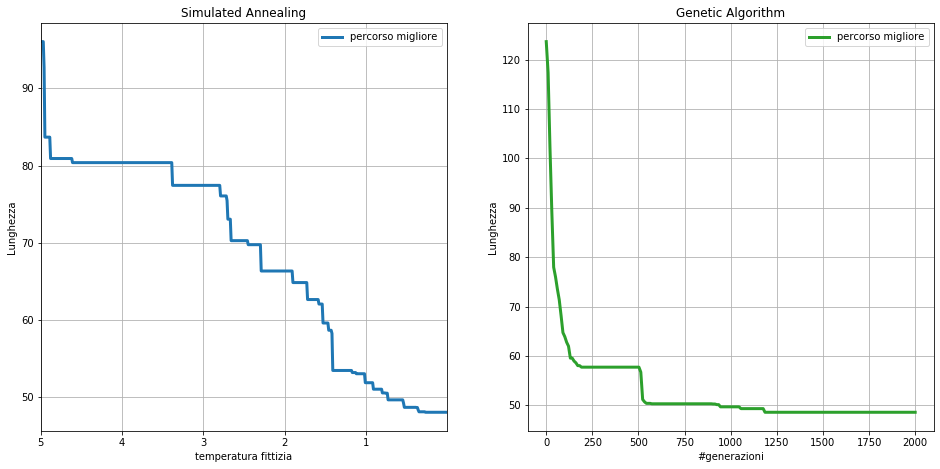

In [63]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7.5))

plt.subplot(121) #Simulated Annealing
t, L = np.loadtxt('./Files/Square/lenght.out', delimiter='  ', unpack=True)
print("Lunghezza finale del Simulated Annealing: ", L[len(L)-1])

plt.plot(t, L, label='percorso migliore', lw=3)
plt.title("Simulated Annealing")
plt.xlim(t[0], t[len(t)-1])
plt.xlabel('temperatura fittizia')
plt.ylabel('Lunghezza')
plt.legend()
plt.grid(True)


plt.subplot(122) #Genetic algorithm
xl, L = np.loadtxt('../LSN_Exercise_09/Files/Square/lenght.out', delimiter='  ', unpack=True)
x = np.linspace(0, 2000, len(xl))
print("Lunghezza finale dell'algoritmo genetico: ", L[len(L)-1])

plt.plot(x, L, label='percorso migliore', lw=3, c='tab:green')
plt.title("Genetic Algorithm")
plt.xlabel('#generazioni')
plt.ylabel('Lunghezza')
plt.legend()
plt.grid(True)

Il grafico seguente mostra il percorso migliore ottenuto tramite simulated annealing confrontato col miglior percorso ottenuto tramite l'algoritmo genetico della scorsa esercitazione. Si può osservare che il risultato ottenuto tramite simulated annealing è migliore di quello ottenuto tramite ricerca genetica e non presenta incroci tra le città.

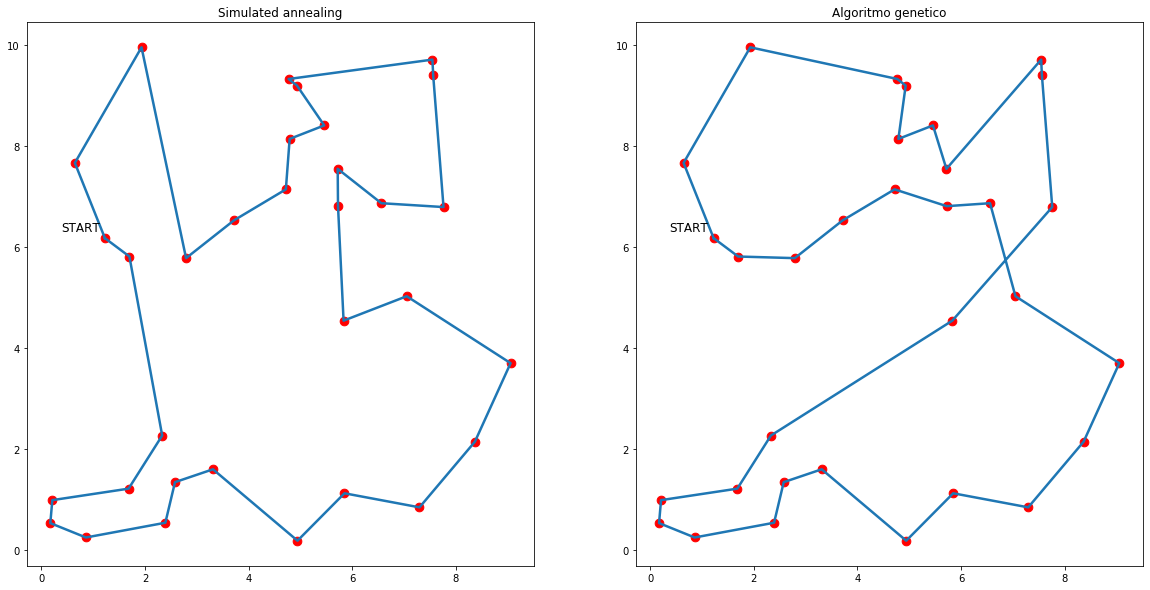

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ncities = 32 #numero delle città
sub = [121, 122] #subplot del grafico
title = ['Simulated annealing', 'Algoritmo genetico'] #titoli dei subplot
xc, yc = np.loadtxt('./Files/Square/cities.out', unpack=True) #coordinate delle città
filepath = ['./Files/Square/best_path.out', '../LSN_Exercise_09/Files/Square/best_path.out'] #path dei percorsi

for j in range(2):
    plt.subplot(sub[j])
    path = np.loadtxt(filepath[j], unpack=True)
    xp = []
    yp = []
    for i in range(ncities):
        index = int(path[i])
        xp.append(xc[index])
        yp.append(yc[index])

    index = int(path[0])
    xp.append(xc[index])
    yp.append(yc[index])

    #numerazione delle città
    #for i in range(32):
    #    plt.text(xp[i]+0.1, yp[i]+0.1, i, fontsize=12)

    plt.title(title[j])
    plt.text(xc[0]-0.85, yc[0]+0.15, 'START', fontsize=12)
    plt.scatter(xc, yc, s=75, c='red') #città
    plt.plot(xp, yp,  zorder=1, lw=2.5) #percorso
    
plt.show()

## Exercise 10.2
Modifico il codice sviluppato nell'esercitazione precedente per ottenere un algoritmo di ricerca genetica per la soluzione del *Travelling salesman problem* che sfrutta la programmazione parallela e lo schema *Single Data Multiple Program*. 

Sviluppo un programma che esegue il medesimo algoritmo di ricerca genetica su nodi diversi che giungono indipendentemente a soluzioni distinte. Implemento una **migrazione** periodica delle soluzioni migliori di ciascun nodo: ogni $nmigr$ generazioni ognuno dei nodi riceve il percorso migliore di un nodo differente e lo inserisce nella propria popolazione sostituendolo ad un percorso scelto tramite l'operatore di selezione della *roulette wheel selection*. Tramite tale procedimento l'algoritmo converge più velocemente al risultato finale.
Come per l'esercitazione precedente utilizzo un **algoritmo elitario** che ad ogni passaggio conserva intatto il 5% migliore della popolazione.

Nei grafici seguenti sono mostrati i risultati dei singoli nodi ottenuti lanciando l'algoritmo genetico parallelizzato su **2, 3 e 4 nodi differenti** con una popolazione di $500$ individui, per $2000$ iterazioni  ed effettuando la migrazione casuale dei migliori percorsi ogni $10$ generazioni. Per confronto è riportata anche la lunghezza del percorso migliore ottenuta dall'algoritmo genetico non parallelizzato sul medesimo insieme di città. 
Si può osservare dai grafici che il programma parallelizzato converge molto velocemente alla soluzione finale impiegando all'incirca 250 generazioni per convergere. In tutti i tre casi, la lunghezza ottenuta risulta qualitativamente simile a quella ottenuta nell'esercitazione precedente, anche se con 2 e 4 nodi si ottiene una soluzione leggermente migliore.

Lunghezza finale dell'algoritmo non parallelo: 48.5786
Lunghezza finale algoritmo parallelizato con  2 nodi: 48.573
Lunghezza finale algoritmo parallelizato con  3 nodi: 48.9909
Lunghezza finale algoritmo parallelizato con  4 nodi: 46.7967


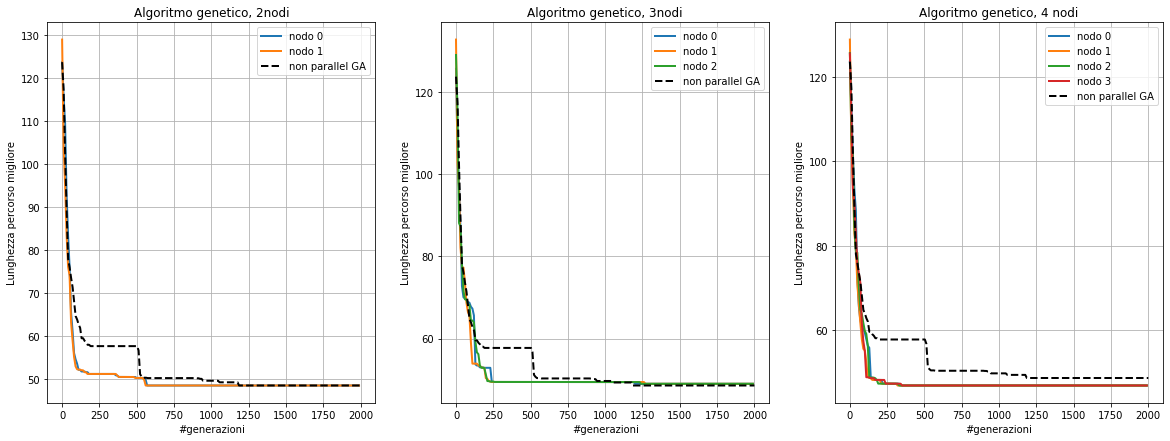

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))

gen, L = np.loadtxt('../LSN_Exercise_09/Files/Square/lenght.out', delimiter='  ', unpack=True)
x = np.linspace(0, 2000, len(gen))
lfin = L[len(L)-1] #lunghezza finale algoritmo non parallelizzato
lfinpar = []    #lunghezza finale algoritmo parallelizzato

nodi = 2
plt.subplot(131) #ricerca parallela con 2 nodi
for i in range (nodi):
    lenfile = './Files/Parallelized2/lenght_rank' + str(i) + '.out'
    n, l = np.loadtxt(lenfile, delimiter='  ', unpack=True)
    plt.plot(n, l, lw=2, label='nodo ' + str(i))
lfinpar.append(l[len(l)-1])
    
plt.plot(x, L, lw=2, ls='dashed', c='black', label='non parallel GA')        
plt.title('Algoritmo genetico, ' + str(nodi) + 'nodi')
plt.xlabel('#generazioni')
plt.ylabel('Lunghezza percorso migliore')
plt.grid(True)
plt.legend()

nodi = 3
plt.subplot(132) #ricerca parallela con 3 nodi
for i in range (nodi):
    lenfile = './Files/Parallelized3/lenght_rank' + str(i) + '.out'
    n, l = np.loadtxt(lenfile, delimiter='  ', unpack=True)
    plt.plot(n, l, lw=2, label='nodo ' + str(i))
lfinpar.append(l[len(l)-1])
    
plt.plot(x, L, lw=2, ls='dashed', c='black', label='non parallel GA')        
plt.title('Algoritmo genetico, ' + str(nodi) + 'nodi')
plt.xlabel('#generazioni')
plt.ylabel('Lunghezza percorso migliore')
plt.grid(True)
plt.legend()

nodi = 4
plt.subplot(133) #ricerca parallela con 4 nodi
for i in range (nodi):
    lenfile = './Files/Parallelized4/lenght_rank' + str(i) + '.out'
    n, l = np.loadtxt(lenfile, delimiter='  ', unpack=True)
    plt.plot(n, l, lw=2, label='nodo ' + str(i))
lfinpar.append(l[len(l)-1])
    
plt.plot(x, L, lw=2, ls='dashed', c='black', label='non parallel GA')        
plt.title('Algoritmo genetico, ' + str(nodi) + ' nodi')
plt.xlabel('#generazioni')
plt.ylabel('Lunghezza percorso migliore')
plt.grid(True)
plt.legend()

print("Lunghezza finale dell'algoritmo non parallelo:", lfin)
for i in range(3):
    print("Lunghezza finale algoritmo parallelizato con ", i+2, "nodi:", lfinpar[i])


plt.show()

I grafici sottostanti mostrano i percorsi ottenuti dall'algoritmo di ricerca genetica parallelizzato su 2,3 e 4 nodi diversi.

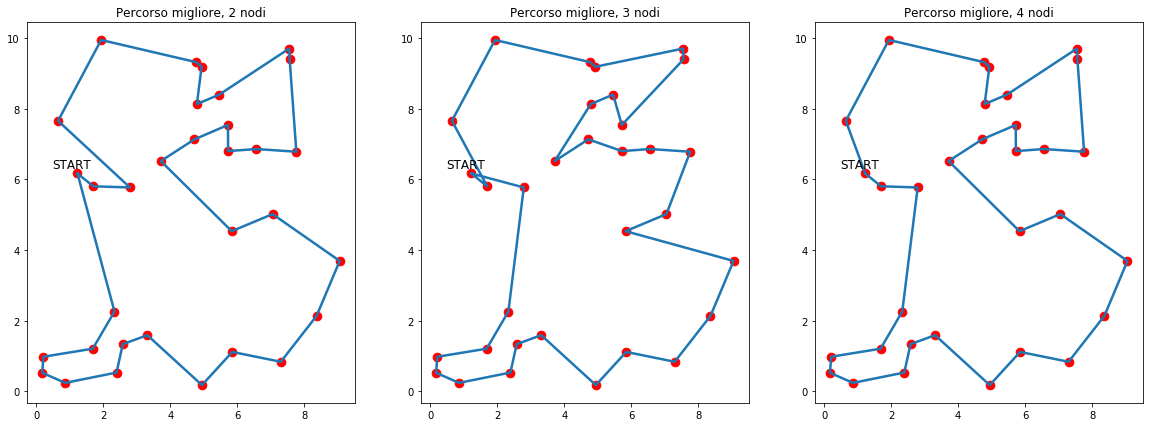

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

ncities = 32
xc, yc = np.loadtxt('./Files/cities.out', unpack=True)
plt.figure(figsize=(20, 7))

sub = [131, 132, 133]
for i in range(3):
    nodi = i+2
    plt.subplot(sub[i])
    path = np.loadtxt('./Files/Parallelized' + str(nodi) + '/best_path.out', unpack=True)

    xp = []
    yp = []

    for i in range(ncities):
        index = int(path[i])
        xp.append(xc[index])
        yp.append(yc[index])

    index = int(path[0])
    xp.append(xc[index])
    yp.append(yc[index])

    #numerazione delle città
    #for i in range(32):
    #    plt.text(xp[i]+0.1, yp[i]+0.1, i, fontsize=12)

    plt.title('Percorso migliore, ' + str(nodi) + ' nodi')
    plt.text(xc[0]-0.75, yc[0]+0.15, 'START', fontsize=12)
    plt.scatter(xc, yc, s=75, c='red') #città
    plt.plot(xp, yp,  zorder=1, lw=2.5) #percorso
    
plt.show()